---

<span style='color:red'>
    
# CAPÍTULO 1 - PANORAMA DEL MACHINE LEARNING

---

<div style="background-color:rgba(241, 196, 15, 0.15); border-left: 5px solid #f1c40f; padding: 15px; border-radius: 5px;">
  <strong style="color: #f1c40f;">Atención:</strong>

    
El presente Notebook ha sido elaborado únicamente con fines educativos, a partir de los ejemplos de código que ha elaborado el Autor del Libro:

  - **Hands-On Machine Learning with Scikit-Learn and Pytorch** - Aurélien Géron.

Para ver el documento originar, por favor visita el repositorio GitHub del autor. [Ver Repositorio](https://github.com/ageron/handson-mlp)

</div>

---

<span style='color:red'>
    
## 1. Librerías del Proyecto

---

<span style='color:red'>
    
### 1.1. Validación Universal de Versiones

---

<div style="background-color:rgba(255, 255, 255, 0.05); border-left: 5px solid #bdc3c7; padding: 15px; border-radius: 5px;">
  <strong style="color: #bdc3c7;">NOTA TÉCNICA:</strong>
    
---

    
Primeramente validamos que las versiones de nuestro entorno virtual sean mínimamente las mismas que el autor **Aurélien Géron** nos recomienda tener instaladas en nuestras computadoras (*ver archivo `pyproject.toml`*):
  * Python >= 3.11
  * Jupyter Lab >= 4.4.9
  * Matplotlib >= 3.10.6
  * Numpy >= 2.3.3
  * Pandas >= 2.3.3
  * Scikit-Learn >= 1.7.2

</div>

In [1]:
# 1. Definimos los Requisitos (Fuente de la Verdad)
requirements = {
    "python": "3.11",
    "jupyterlab": "4.4.9",
    "matplotlib": "3.10.6",
    "numpy": "2.3.3",
    "pandas": "2.3.3",
    "scikit-learn": "1.7.2"
}

In [2]:
import sys
import importlib.metadata
from packaging import version

print("-" * 60)
print(f"{'LIBRERÍA':<15} | {'ACTUAL':<12} | {'REQUERIDA':<12} | {'ESTADO'}")
print("-" * 60)

# 2. Función de validación universal
def validate_version(lib_name, min_version):
    # Obtener versión instalada
    if lib_name == "python":
        current_ver = sys.version.split()[0]
    else:
        try:
            # Usamos importlib para obtener la versión sin importar la librería entera aún
            current_ver = importlib.metadata.version(lib_name)
        except importlib.metadata.PackageNotFoundError:
            print(f"{lib_name:<15} | {'NO INSTALADA':<12} | >={min_version:<10} | ❌ ERROR")
            return False

    # Comparar versiones de forma inteligente
    if version.parse(current_ver) >= version.parse(min_version):
        print(f"{lib_name:<15} | {current_ver:<12} | >={min_version:<10} | ✅ OK")
        return True
    else:
        print(f"{lib_name:<15} | {current_ver:<12} | >={min_version:<10} | ⚠️ ACTUALIZAR")
        return False

# 3. Ejecución del Loop de Validación
all_passed = True
for library, required_ver in requirements.items():
    if not validate_version(library, required_ver):
        all_passed = False

# 4. Bloqueo de seguridad
print("-" * 60)
if all_passed:
    print("\n🚀 TODO LISTO: El entorno cumple con los estándares del proyecto.\n")
else:
    raise RuntimeError("⛔ DETENIDO: Una o más librerías no cumplen con la versión mínima requerida en pyproject.toml.")

------------------------------------------------------------
LIBRERÍA        | ACTUAL       | REQUERIDA    | ESTADO
------------------------------------------------------------
python          | 3.12.12      | >=3.11       | ✅ OK
jupyterlab      | 4.5.1        | >=4.4.9      | ✅ OK
matplotlib      | 3.10.8       | >=3.10.6     | ✅ OK
numpy           | 2.4.0        | >=2.3.3      | ✅ OK
pandas          | 2.3.3        | >=2.3.3      | ✅ OK
scikit-learn    | 1.8.0        | >=1.7.2      | ✅ OK
------------------------------------------------------------

🚀 TODO LISTO: El entorno cumple con los estándares del proyecto.



---

<span style='color:red'>
    
### 1.2. Importar Librerías

In [3]:
# Ahora importamos las librerías
import pandas as pd
import numpy as np

# obliga a Matplotlib a que renderice los gráficos como imágenes estáticas 
# ...dentro del notebook, no como ventanas externas.
# %matplotlib inline 
import matplotlib.pyplot as plt

In [4]:
# Definimos los tamaños de letras para la impresión de las visualizaciones:
#
# rc (runtime configuration function): se utiliza para modificar los 
#                                      parámetros de configuración globales.
plt.rc('font', size=12)
plt.rc('axes', labelsize=14, titlesize=18)
plt.rc('legend', fontsize=10)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

---

<span style='color:red'>

## 2. Entrenamiento Básico de un Modelo de Regresión Lineal

<div style="background-color:rgba(241, 196, 15, 0.15); border-left: 5px solid #f1c40f; padding: 15px; border-radius: 5px;">
  <strong style="color: #f1c40f;">OBJETIVO DEL LABORATORIO:</strong>

**¿El dinero hace más feliz a la gente?**


---

Para poder dar una respuesta a esta duda, el autor **Aurélien Géron** propone:

  1. Obtener los datos del `Índice de Calidad de Vida` (*Better Life Index*) de la página de la **OECD** (*Organización para la Cooperación y el Desarrollo Económico*) [OECD](https://www.oecd.org/en/data/tools/well-being-data-monitor.html)

  2. Obtener los datos del `Producto Interno Bruto per Cápita` (*Gross Domestic Product - GDP*) de la página del **World Bank Stats** (*Estadísticas del Banco Mundial*) [Our World in Data](https://ourworldindata.org/)


In [5]:
# PASO 1. Descargamos los datos del repositorio de GitHub del autor Aurélien Géron
data_root = 'https://github.com/ageron/data/raw/main/lifesat/lifesat.csv'
lifesat = pd.read_csv(data_root)
lifesat.head()

,Country,GDP per capita (USD),Life satisfaction
0,Russia,26456.387938,5.8
1,Greece,27287.083401,5.4
2,Turkey,28384.987785,5.5
3,Latvia,29932.493910,5.9
4,Hungary,31007.768407,5.6


In [6]:
lifesat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Country               27 non-null     object 
 1   GDP per capita (USD)  27 non-null     float64
 2   Life satisfaction     27 non-null     float64
dtypes: float64(2), object(1)
memory usage: 780.0+ bytes


In [7]:
# PASO 2. Preparamos los datos para el entrenamiento del modelo de Regresión Lineal
X = lifesat[['GDP per capita (USD)']].values # (Matriz de Características) Numpy array 2D
y = lifesat['Life satisfaction'].values # Numpy array 1D

In [8]:
print(f'- Número de Dimensiones para "X" (feature): {X.ndim}\n- Número de Dimensiones para "y" (target) : {y.ndim}')

- Número de Dimensiones para "X" (feature): 2
- Número de Dimensiones para "y" (target) : 1


<div style="background-color:rgba(241, 196, 15, 0.15); border-left: 5px solid #f1c40f; padding: 15px; border-radius: 5px;">
  <strong style="color: #f1c40f;">TOMA NOTA:</strong>

Cuando entrenas un modelo (*como una Regresión Lineal*), la librería Scikit-Learn espera dos cosas distintas:

- **La Matriz de Características ($X$):** Debe ser siempre 2D (*filas, columnas*). Incluso si solo tienes una característica (*como el PIB per cápita*), Scikit-Learn necesita entenderla como una "tabla de una sola columna".

- **El Vector Objetivo` ($y$):** Suele ser 1D. Es simplemente una lista de las etiquetas (*labels, targets*) que queremos predecir.

</div>

In [9]:
X[:5]

array([[26456.38793813],
       [27287.08340093],
       [28384.98778463],
       [29932.49391006],
       [31007.76840654]])

In [10]:
y[:5]

array([5.8, 5.4, 5.5, 5.9, 5.6])

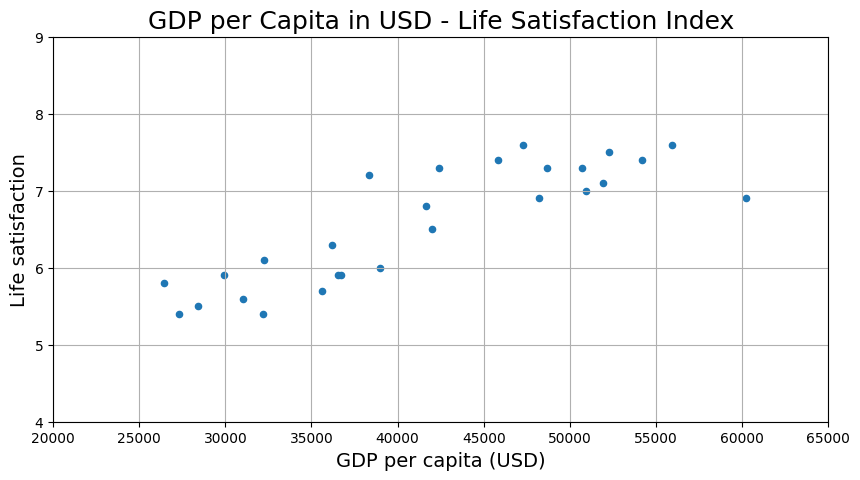

In [11]:
# PASO 3. Visualización de los datos 
lifesat.plot(kind='scatter', x='GDP per capita (USD)',
             y='Life satisfaction', grid=True, figsize=(10,5), 
             title='GDP per Capita in USD - Life Satisfaction Index')
plt.axis([20_000, 65_000, 4, 9])
plt.show()

---
---

PRIMEROS PASOS EN EL MUNDO DEL MACHINE LEARNING

---
---

<div style="background-color:rgba(0, 190, 255, 0.1); border-left: 5px solid #00beff; padding: 15px; border-radius: 5px;">
  <strong style="color: #00beff;">Concepto Clave:</strong>


```python

from sklearn.linear_model import LinearRegression


```

1. **El Paquete**: `sklearn`
    * **Concepto:** Es la librería principal, el contenedor "padre". Literalmente es una carpeta llamada $sklear$ dentro del entorno activo de Python.
>

2. **El Sub-Módulo**: `.linear_model`
    * **Concepto:** Es una división lógica dentro del paquete $sklearn$.
      * Sckikt-Learn es inmenso, por lo que los desarrolladores agruparon todos los algorítmos que se basan en modelos lineales en este compartimiento.
      * *Físicamente es una sub-carpeta dentro de $sklearn$*
>

3. **La Clase**: `LinearRegression`
    * **Concepto:** "$LinearRegression$" Es el "plano" o la receta. No hace nada por sí misma, solo define cómo debería comportarse una regresión lineal.
>

4. **El Objeto o Instancia**: `model`
    * **Concepto:** "$model$" es el Objeto (o Instancia). Es una "casa" construida a partir del plano anterior. Es una entidad viva en la memoria de tu computador.
>

5. **El Método**: `.fit(X, y)`
    * **Concepto:** $.fit()$ y $.predict()$ son Métodos.
      * En Python, un método es simplemente una función que pertenece a un objeto.
      * A diferencia de una función normal (como print() o len()), un método actúa sobre el objeto que lo llama.

</div>

<div style="background-color:rgba(0, 190, 255, 0.1); border-left: 5px solid #00beff; padding: 15px; border-radius: 5px;">
  <strong style="color: #00beff;">Resumen de Terminología:</strong>

|Término|Ejemplo de Código|Definición Profesional|
|:---|:---|:---|
|**Paquete**|`sklearn`|Librería principal, contenedor "padre"|
|**Sub-módulo**|`.linear_model`|división lógica dentro del paquete `sklearn`|
|**Clase**|`LinearRegression`|La definición abstracta del modelo|
|**Instancia**|`model`|El modelo específico que reside en memoria|
|**Método**|`.fit()`, `.predict()`|Las acciones que el modelo puede realizar|
|**Argumentos**|`X`, `y`|Los datos que le pasas al método para que trabaje|

</div>

In [12]:
# PASO 4. Entrenando el Modelo de Regresión Lineal
from sklearn.linear_model import LinearRegression

# Seleccionamos un modelo
model = LinearRegression()

# Entrenamos el modelo
model.fit(X, y)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [14]:
# PASO 5. Realizamos una predicción en función al modelo entrenado

# Imaginemos que el valor del PIB per capita de Puerto Rico (33_442 USD), pero no tenemos el dato del "Indice de Satisfacción de Vida",
# ...sin embargo este dato lo podemos predecir gracias a nuestro modelo recientemente entrenado, de la siguiente manera:
X_pr = [[33_442]]

print(model.predict(X_pr))

[6.01604906]


<div style="background-color:rgba(0, 190, 255, 0.1); border-left: 5px solid #00beff; padding: 15px; border-radius: 5px;">
  <strong style="color: #00beff;">¿Qué ocurre realmente dentro del Método .fit()?:</strong>

>

Cuando llamas a $model.fit(X, y)$, no es solo una caja negra.

  1. El método toma tus datos (X, y).
    
  2. Ejecuta el algoritmo matemático (*Descenso de Gradiente*).

  3. Modifica el estado interno de la instancias u objeto $model$.

     * **Aquí es donde ocurre la magia:** El método $.fit()$ calcula los parámetros (*como la pendiente y la intersección*) y los guarda dentro del objeto model.



<div style="background-color:rgba(241, 196, 15, 0.15); border-left: 5px solid #f1c40f; padding: 15px; border-radius: 5px;">
  <strong style="color: #f1c40f;">Atención:</strong>
    
  Si intentas usar $predict()$ antes de usar $fit()$, te daría un error `(NotFittedError)`.
  
   - El método $predict()$ necesita leer la información que el método $fit()$ guardó en la instancia **model**.

</div>

---

<div style="background-color:rgba(155, 89, 182, 0.15); border-left: 5px solid #9b59b6; padding: 15px; border-radius: 5px;">
  <strong style="color: #9b59b6;">Ecuación de un modelo Lineal Simple:</strong>
  
   
$$\LARGE \text{life satisfaction} = \theta_0 + \theta_1 \times \text{GDP per capita}$$

</div>

In [15]:
print(f'- El intercepto de la recta es: {model.intercept_}')
print(f'- La pendiente de la recta es: {model.coef_}')

- El intercepto de la recta es: 3.7490494273769093
- La pendiente de la recta es: [6.77889969e-05]


<div style="background-color:rgba(0, 190, 255, 0.1); border-left: 5px solid #00beff; padding: 15px; border-radius: 5px;">
  <strong style="color: #00beff;">El misterio del guion bajo "_":</strong>

>

Esta es una convención de Scikit-Learn:
   * Todo atributo que termina en guion bajo significa que **es un valor calculado/aprendido por el modelo durante el proceso de entrenamiento**.
   * Si el atributo no tiene guion bajo, suele ser un **parámetro que tú configuraste antes de entrenar** (hiperparámetro).

---

1. `model.intercept_` ($\theta_0$)

      * **Significado**: Es el punto donde la línea recta corta al eje vertical (Y).
      * **Interpretación en el proyecto**: Es el valor predicho de la satisfacción de vida si el GDP per capita fuera exactamente 0. Es como el "punto de partida" base de la felicidad antes de considerar el dinero.
      * **Formato**: Generalmente es un solo número (un flotante).

>

2. `model.coef_` ($\theta_1$)

   * Este atributo representa la Pendiente (o el "Peso/Weight").
      * **Significado**: Indica la inclinación de la recta. Nos dice cuánto cambia $Y$ por cada unidad que aumenta $X$.
      * **Interpretación en el proyecto**: Nos dice cuánto aumenta la satisfacción de vida por cada dólar extra en el GDP per capita. Si el número es positivo, a más dinero, más felicidad. Si fuera negativo, sería lo contrario.
      * **Formato**: Es un array de Numpy. ¿Por qué? Porque si tuvieras múltiples variables (GDP, Educación, Salud), tendrías múltiples coeficientes. Como aquí solo tienes una variable, será un array con un solo elemento.



</div>

---

<div style="background-color:rgba(0, 190, 255, 0.1); border-left: 5px solid #00beff; padding: 15px; border-radius: 5px;">
  <strong style="color: #00beff;">Concepto Clave:</strong>
  Aquí iría tu explicación sobre la Regresión Lineal. Se ve futurista y limpio.
</div>

<div style="background-color:rgba(46, 204, 113, 0.15); border-left: 5px solid #2ecc71; padding: 15px; border-radius: 5px;">
  <strong style="color: #2ecc71;">Resultado:</strong>
  El modelo ha convergido exitosamente con un score de 0.85.
</div>

<div style="background-color:rgba(155, 89, 182, 0.15); border-left: 5px solid #9b59b6; padding: 15px; border-radius: 5px;">
  <strong style="color: #9b59b6;">Ecuación Matemática:</strong>
  Aquí iría tu fórmula LaTeX. Da un toque muy "Senior".
</div>

<div style="background-color:rgba(241, 196, 15, 0.15); border-left: 5px solid #f1c40f; padding: 15px; border-radius: 5px;">
  <strong style="color: #f1c40f;">Atención:</strong>
    Recuerda siempre escalar los datos antes de entrenar este modelo.
    - https://github.com/ageron/handson-mlp
</div>

<div style="background-color:rgba(255, 255, 255, 0.05); border-left: 5px solid #bdc3c7; padding: 15px; border-radius: 5px;">
  <strong style="color: #bdc3c7;">Nota Técnica:</strong>
  Este bloque es sutil y muy elegante para comentarios menores.
</div>